# LeNet 5 using TF and Keras

### 1. Import required packages

In [48]:
from __future__ import print_function
%matplotlib inline
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar100, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")
print('The Tensorflow version is {}.'.format(tf.__version__))
print('The Keras version is {}.'.format(keras.__version__))
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print(np.__file__)

Packages Loaded
The Tensorflow version is 2.1.0.
The Keras version is 2.2.4-tf.
The Pandas version is 1.0.3.
The Numpy version is 1.18.1.
C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\numpy\__init__.py


### 2. Pipe line the MNIST Dataset from keras

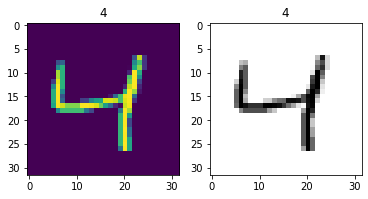

Shape of Minist train data (60000, 32, 32, 1).
Shape of Minist test data (10000, 32, 32, 1).


In [20]:
#Download the minist data from keras
mnist = tf.keras.datasets.mnist

#Split the data between train and test data
(x1_train, y1_train),(x1_test, y1_test) = mnist.load_data()

#Split the data between train and test data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Normalize the data 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

#Zero pad mnist data from 28 to 32
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Display a sample image
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
_ = ax1.set_title(y1_train[2])
_ = plt.imshow(x_train[2])

ax2 = plt.subplot(1,2,2)
_ = ax2.set_title(y1_train[2])
_ = plt.imshow(x_train[2], cmap = plt.cm.binary)
_ = plt.show()

# Add a new axis, because we have gray scale images with one channel
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Minist train data {}.'.format(x_train.shape))
print('Shape of Minist test data {}.'.format(x_test.shape))

### 3. Add CNN 32 maps with filter size 5

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.5111 - accuracy: 0.8507 - val_loss: 0.2337 - val_accuracy: 0.9298
Epoch 2/10
48000/48000 [==============================] - 7s 137us/sample - loss: 0.2000 - accuracy: 0.9391 - val_loss: 0.1470 - val_accuracy: 0.9567
Epoch 3/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.1316 - accuracy: 0.9596 - val_loss: 0.1143 - val_accuracy: 0.9657
Epoch 4/10
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0984 - accuracy: 0.9704 - val_loss: 0.0994 - val_accuracy: 0.9699
Epoch 5/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0761 - accuracy: 0.9773 - val_loss: 0.0785 - val_accuracy: 0.9761
Epoch 6/10
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0747 - val_accuracy: 0.9782
Epoch 7/10
48000/48000 [==========================

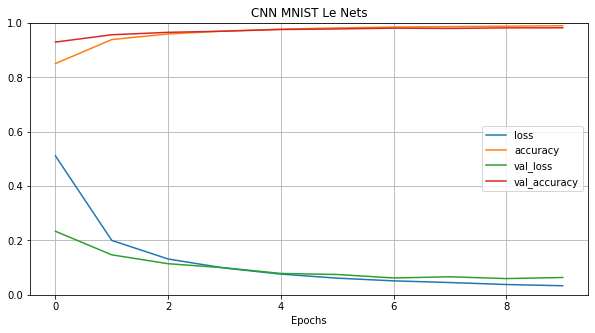

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0597 - accuracy: 0.9814
Validation Accuracy: 0.9814
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0     

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, [5, 5], strides=(1, 1), activation='tanh', input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

datetime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',datetime,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(x_train, y_train,
                  batch_size=256,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
_ = history.plot(figsize=(10,5))
_ = plt.grid(True)
_ = plt.gca().set_ylim(0,1)
_ = plt.xlabel('Epochs')
_ = plt.title('CNN MNIST Le Nets')
_ = plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(x_test,y_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

### 4. Display the accuracy logs on Tensorboard

In [22]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit --host localhost --port 8089

### 5. Plot the prediction results

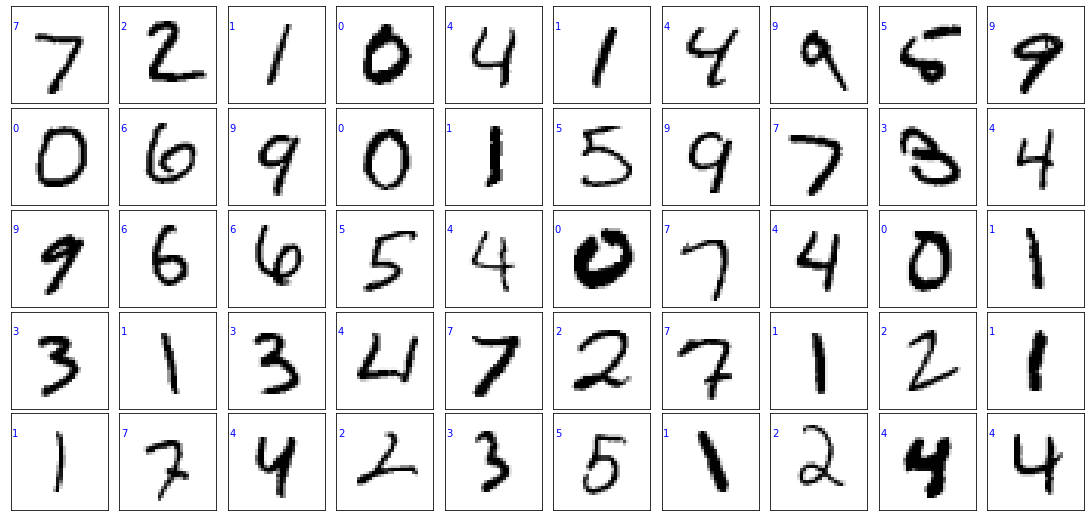

In [23]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

prediction_values = model.predict_classes(x_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(x_test[i,:], [32, 32]),cmap=plt.cm.gray_r, interpolation='nearest')

    if prediction_values[i] == np.argmax(y_test[i]):
        # label the image with the blue text
        _ = ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    else:
        # label the image with the red text
        _ = ax.text(0, 7, class_names[prediction_values[i]], color='red')


## LeNet on MNIST Fashion dataset

### 1. Load the fashion mnist data

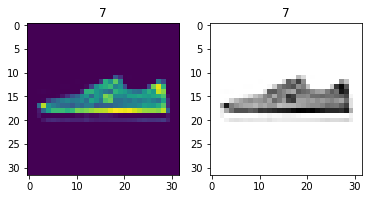

Shape of Minist fashion train data (60000, 32, 32, 1).
Shape of Minist fashion test data (10000, 32, 32, 1).


In [24]:
#Download the minist data from keras
mnist_f = tf.keras.datasets.fashion_mnist

#Split the data between train and test data
(x2_train, y2_train),(x1_test, y1_test) = mnist_f.load_data()

#Split the data between train and test data
(xf_train, yf_train),(xf_test, yf_test) = mnist_f.load_data()

#Normalize the data 
xf_train = xf_train.astype('float32')
xf_test = xf_test.astype('float32')
xf_train /= 255
xf_test /= 255

#xf_train = tf.keras.utils.normalize(xf_train, axis=1)
#xf_test = tf.keras.utils.normalize(xf_test, axis=1)

#Zero pad mnist data from 28 to 32
xf_train = tf.pad(xf_train, [[0, 0], [2,2], [2,2]])
xf_test = tf.pad(xf_test, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
yf_train = tf.keras.utils.to_categorical(yf_train, 10)
yf_test = tf.keras.utils.to_categorical(yf_test, 10)

#Display a sample image
fig = plt.figure()
_ = ax1 = plt.subplot(1,2,1)
_ = ax1.set_title(y2_train[14])
_ = plt.imshow(xf_train[14])

ax2 = plt.subplot(1,2,2)
_ = ax2.set_title(y2_train[14])
_ = plt.imshow(xf_train[14], cmap = plt.cm.binary)
_ = plt.show()

# Add a new axis, because we have gray scale images with one channel
xf_train = xf_train[:, :, :, np.newaxis]
xf_test = xf_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Minist fashion train data {}.'.format(xf_train.shape))
print('Shape of Minist fashion test data {}.'.format(xf_test.shape))

### 2. Train the LeNet

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.7543 - accuracy: 0.7299 - val_loss: 0.5182 - val_accuracy: 0.8133
Epoch 2/10
48000/48000 [==============================] - 7s 143us/sample - loss: 0.4812 - accuracy: 0.8271 - val_loss: 0.4508 - val_accuracy: 0.8354
Epoch 3/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.4267 - accuracy: 0.8468 - val_loss: 0.4285 - val_accuracy: 0.8433
Epoch 4/10
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3900 - accuracy: 0.8595 - val_loss: 0.3905 - val_accuracy: 0.8582
Epoch 5/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.3670 - accuracy: 0.8669 - val_loss: 0.3730 - val_accuracy: 0.8659
Epoch 6/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.3492 - accuracy: 0.8740 - val_loss: 0.3572 - val_accuracy: 0.8690
Epoch 7/10
48000/48000 [==========================

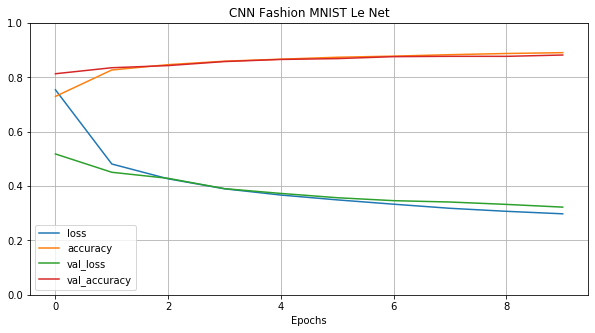

10000/10000 [==============================] - 1s 98us/sample - loss: 0.3467 - accuracy: 0.8755
Validation Accuracy: 0.8755
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0      

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, [5, 5], strides=(1, 1), activation='tanh', input_shape=xf_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

datetime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',datetime,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(xf_train, yf_train,
                  batch_size=256,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
_ = history.plot(figsize=(10,5))
_ = plt.grid(True)
_ = plt.gca().set_ylim(0,1)
_ = plt.xlabel('Epochs')
_ = plt.title('CNN Fashion MNIST Le Net')
_ = plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(xf_test,yf_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

### 3. Run the tensor board

In [28]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit --host localhost --port 8088

### 4. Plot the prediction results

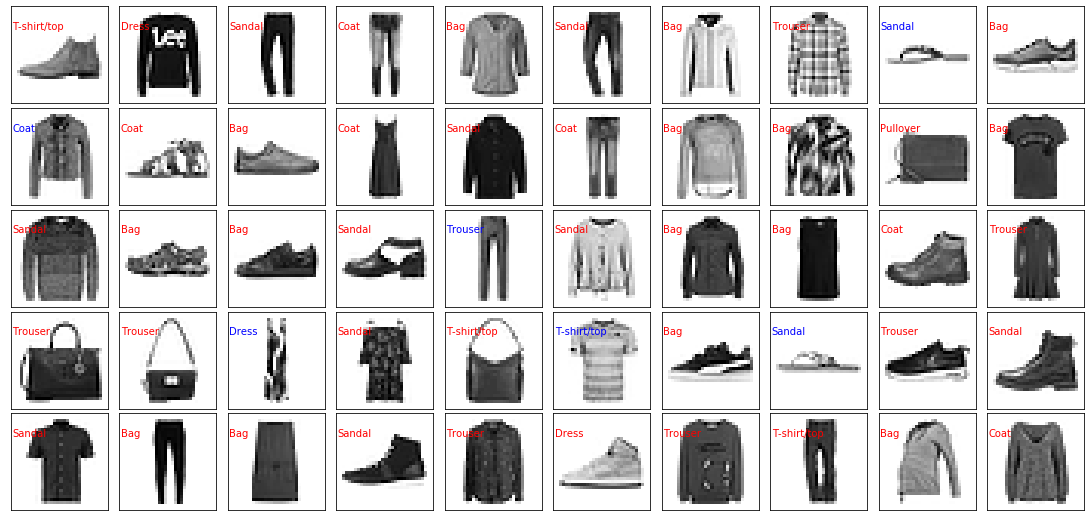

In [29]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

predictionf_values = model.predict_classes(x_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
_ = fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(xf_test[i,:], [32, 32]),cmap=plt.cm.gray_r, interpolation='nearest')

    if predictionf_values[i] == np.argmax(yf_test[i]):
        # label the image with the blue text
        _ = ax.text(0, 7, class_names[predictionf_values[i]], color='blue')
    else:
        # label the image with the red text
        _ = ax.text(0, 7, class_names[predictionf_values[i]], color='red')

## LeNet on Cifar 10 dataset

### 1. Load the cifar dataset

C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


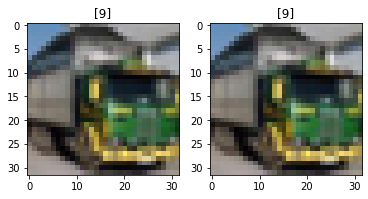

Shape of Minist fashion train data (50000, 32, 32, 3).
Shape of Minist fashion test data (10000, 32, 32, 3).


In [30]:
#Download the cifar data from keras
cifar10 = tf.keras.datasets.cifar10

#Split the data between train and test data
(x3_train, y3_train),(x3_test, y3_test) = cifar10.load_data()

#Split the data between train and test data
(xc_train, yc_train),(xc_test, yc_test) = cifar10.load_data()

#Normalize the data 
xc_train = xc_train.astype('float32')
xc_test = xc_test.astype('float32')
xc_train /= 255
xc_test /= 255

#xc_train = tf.keras.utils.normalize(xc_train, axis=1)
#xc_test = tf.keras.utils.normalize(xc_test, axis=1)

#Zero pad is not needed as cifar data is 32 * 32
#xf_train = tf.pad(xf_train, [[0, 0], [2,2], [2,2]])
#xf_test = tf.pad(xf_test, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
yc_train = tf.keras.utils.to_categorical(yc_train, 10)
yc_test = tf.keras.utils.to_categorical(yc_test, 10)

#Display a sample image
fig = plt.figure()
_ = ax1 = plt.subplot(1,2,1)
_ = ax1.set_title(y3_train[14])
_ = plt.imshow(xc_train[14])

ax2 = plt.subplot(1,2,2)
_ = ax2.set_title(y3_train[14])
_ = plt.imshow(xc_train[14], cmap = plt.cm.binary)
_ = plt.show()

# new axis is not needed as cifar dataset is of color images having 3 channesl. 
#xc_train = xc_train[:, :, :, np.newaxis]
#xc_test = xc_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Minist fashion train data {}.'.format(xc_train.shape))
print('Shape of Minist fashion test data {}.'.format(xc_test.shape))

### 3.Train the LeNet on Cifar 10

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 320us/sample - loss: 1.8084 - accuracy: 0.3585 - val_loss: 1.7406 - val_accuracy: 0.3798
Epoch 2/10
40000/40000 [==============================] - 13s 313us/sample - loss: 1.6013 - accuracy: 0.4343 - val_loss: 1.5482 - val_accuracy: 0.4513
Epoch 3/10
40000/40000 [==============================] - 13s 318us/sample - loss: 1.4712 - accuracy: 0.4775 - val_loss: 1.4817 - val_accuracy: 0.4788
Epoch 4/10
40000/40000 [==============================] - 13s 325us/sample - loss: 1.3820 - accuracy: 0.5106 - val_loss: 1.4209 - val_accuracy: 0.5012
Epoch 5/10
40000/40000 [==============================] - 13s 331us/sample - loss: 1.3169 - accuracy: 0.5343 - val_loss: 1.3858 - val_accuracy: 0.5113
Epoch 6/10
40000/40000 [==============================] - 14s 352us/sample - loss: 1.2619 - accuracy: 0.5556 - val_loss: 1.3725 - val_accuracy: 0.5221
Epoch 7/10
40000/40000 [====================

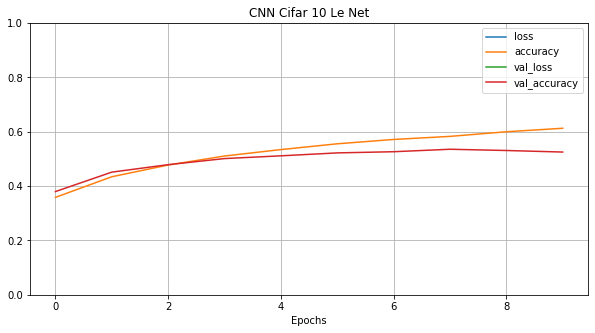

10000/10000 [==============================] - 2s 150us/sample - loss: 1.3776 - accuracy: 0.5219
Validation Accuracy: 0.5219
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0     

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, [5, 5], strides=(1, 1), activation='tanh', input_shape=xc_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

datetime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',datetime,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(xc_train, yc_train,
                  batch_size=32,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
_ = history.plot(figsize=(10,5))
_ = plt.grid(True)
_ = plt.gca().set_ylim(0,1)
_ = plt.xlabel('Epochs')
_ = plt.title('CNN Cifar 10 Le Net')
_ = plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(xc_test,yc_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

### 3. Plot accuracies on Tensorboard

In [34]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit --host localhost --port 8088

### 4. Plot the predictions

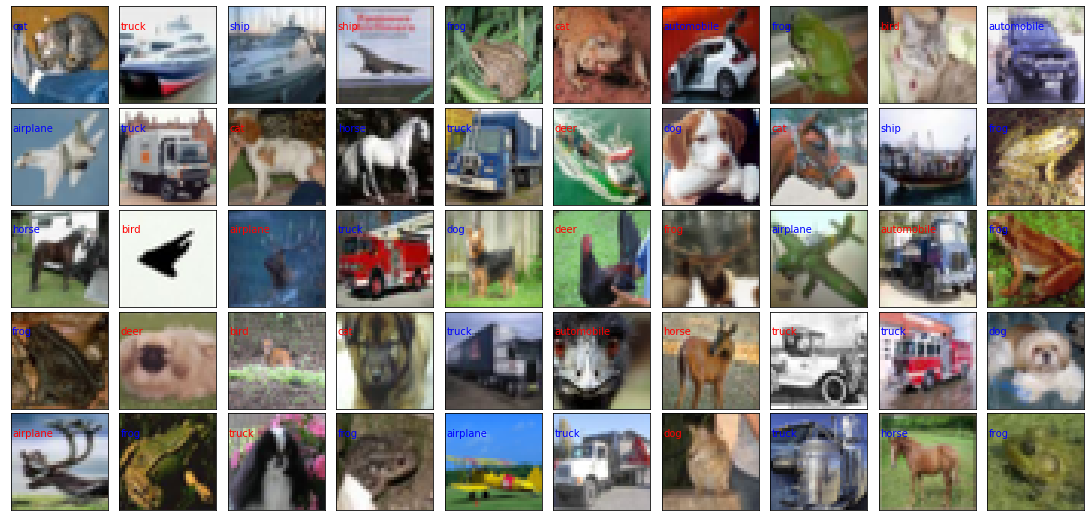

In [35]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

predictionc_values = model.predict_classes(xc_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(xc_test[i,:], [32, 32,3]),cmap=plt.cm.gray_r, interpolation='nearest')

    if predictionc_values[i] == np.argmax(yc_test[i]):
        # label the image with the blue text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='blue')
    else:
        # label the image with the red text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='red')

## LeNet for Cifrar 100 Dataset

### 1. Load the Cifar 100 dataset

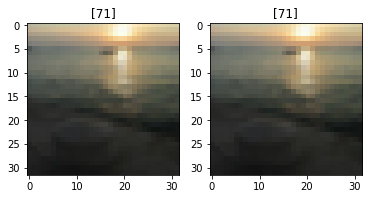

Shape of Minist fashion train data (50000, 32, 32, 3).
Shape of Minist fashion test data (10000, 32, 32, 3).


In [46]:
#Download the cifar data from keras
cifar100 = tf.keras.datasets.cifar100

#Split the data between train and test data
(x4_train, y4_train),(x4_test, y4_test) = cifar100.load_data()

#Split the data between train and test data
(xc1_train, yc1_train),(xc1_test, yc1_test) = cifar100.load_data()

#Normalize the data 
xc1_train = xc1_train.astype('float32')
xc1_test = xc1_test.astype('float32')
xc1_train /= 255
xc1_test /= 255

#xc1_train = tf.keras.utils.normalize(xc1_train, axis=1)
#xc1_test = tf.keras.utils.normalize(xc1_test, axis=1)

#Zero pad is not needed as cifar data is 32 * 32
#xf1_train = tf.pad(xf1_train, [[0, 0], [2,2], [2,2]])
#xf1_test = tf.pad(xf1_test, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
yc1_train = tf.keras.utils.to_categorical(yc1_train, 100)
yc1_test = tf.keras.utils.to_categorical(yc1_test, 100)

#Display a sample image
fig = plt.figure()
_ = ax1 = plt.subplot(1,2,1)
_ = ax1.set_title(y4_train[14])
_ = plt.imshow(xc1_train[14])

ax2 = plt.subplot(1,2,2)
_ = ax2.set_title(y4_train[14])
_ = plt.imshow(xc1_train[14], cmap = plt.cm.binary)
_ = plt.show()

# new axis is not needed as cifar dataset is of color images having 3 channesl. 
#xc_train = xc_train[:, :, :, np.newaxis]
#xc_test = xc_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Minist fashion train data {}.'.format(xc1_train.shape))
print('Shape of Minist fashion test data {}.'.format(xc1_test.shape))

### 2. Train the LeNet

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 329us/sample - loss: 3.9697 - accuracy: 0.1014 - val_loss: 3.7830 - val_accuracy: 0.1356
Epoch 2/10
40000/40000 [==============================] - 13s 320us/sample - loss: 3.5848 - accuracy: 0.1647 - val_loss: 3.5276 - val_accuracy: 0.1755
Epoch 3/10
40000/40000 [==============================] - 13s 320us/sample - loss: 3.4106 - accuracy: 0.1943 - val_loss: 3.4261 - val_accuracy: 0.1924
Epoch 4/10
40000/40000 [==============================] - 13s 330us/sample - loss: 3.2899 - accuracy: 0.2147 - val_loss: 3.4137 - val_accuracy: 0.1992
Epoch 5/10
40000/40000 [==============================] - 13s 325us/sample - loss: 3.1878 - accuracy: 0.2349 - val_loss: 3.3258 - val_accuracy: 0.2115
Epoch 6/10
40000/40000 [==============================] - 13s 324us/sample - loss: 3.1039 - accuracy: 0.2492 - val_loss: 3.2815 - val_accuracy: 0.2188
Epoch 7/10
40000/40000 [====================

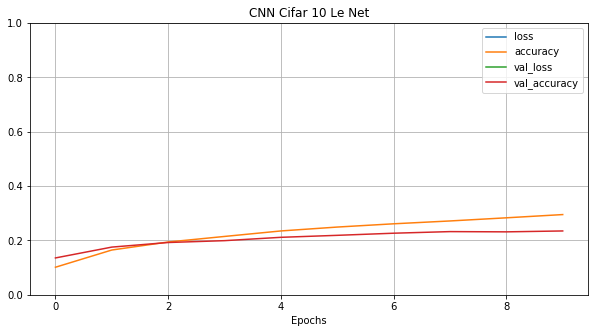

10000/10000 [==============================] - 1s 122us/sample - loss: 3.2305 - accuracy: 0.2315
Validation Accuracy: 0.2315
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_9 (Flatten)          (None, 120)               0     

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, [5, 5], strides=(1, 1), activation='tanh', input_shape=xc1_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, [5, 5], strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.softmax))

datetime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',datetime,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(xc1_train, yc1_train,
                  batch_size=32,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
_ = history.plot(figsize=(10,5))
_ = plt.grid(True)
_ = plt.gca().set_ylim(0,1)
_ = plt.xlabel('Epochs')
_ = plt.title('CNN Cifar 10 Le Net')
_ = plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(xc1_test,yc1_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

### 3. Plot the predictions

In [71]:
wd = os. getcwd()
label_dir = os.path.join(wd,'data','Labels.csv')
print(label_dir)
cols = ["cifar100"]
label_df = pd.read_csv(label_dir)
class_names = label_df['cifarh'].tolist()

C:\Users\pmspr\Documents\Machine Learning\Computer vision\Git Repo\Convolutions\data\Labels.csv


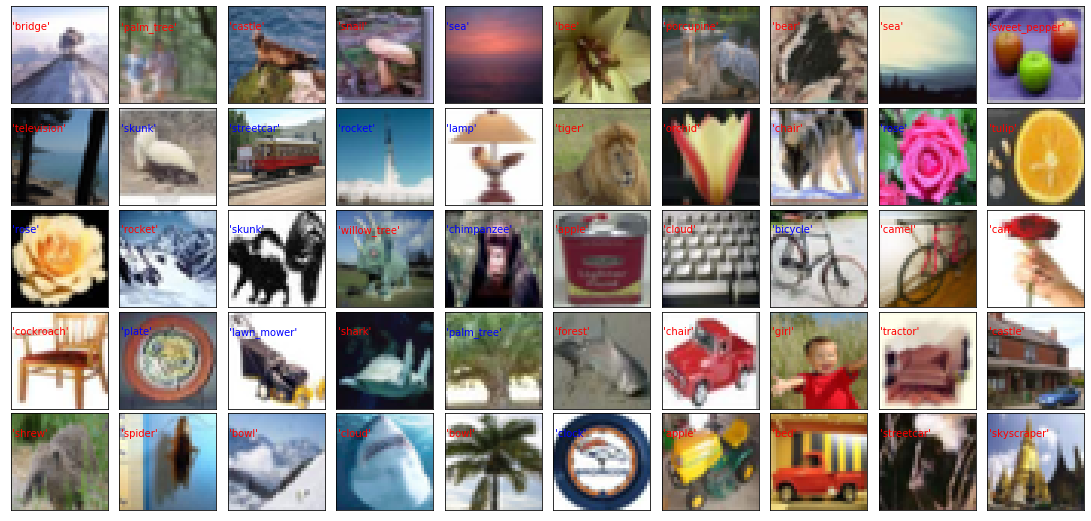

In [73]:
predictionc_values = model.predict_classes(xc1_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(xc1_test[i,:], [32, 32,3]),cmap=plt.cm.gray_r, interpolation='nearest')

    if predictionc_values[i] == np.argmax(yc1_test[i]):
        # label the image with the blue text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='blue')
    else:
        # label the image with the red text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='red')

In [75]:
%load_ext tensorboard
%tensorboard --logdir logs/fit --host localhost --port 8089

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 8089 (pid 14340), started 2:38:49 ago. (Use '!kill 14340' to kill it.)